# Program Converting .mp3 to .wav and Numpy Array

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plot
import scipy
from scipy.io import wavfile
import pydub
from audio2numpy import open_audio
import os
from os import path
from pydub import AudioSegment
import tempfile
import soundfile as sf

In [2]:
#Functions
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

#Writes a wav file from an mp3
def mp3_to_wav(mp3Path):
    sound = AudioSegment.from_mp3(mp3Path)
    sound.export(os.path.splitext(mp3Path)[0]+".wav",format="wav")

# Open Audio Method of writing numpy array from mp3
### https://pypi.org/project/audio2numpy/

c:\users\jacob\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0.5, 0, 'Time (s)')

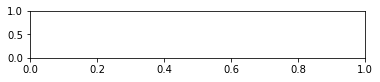

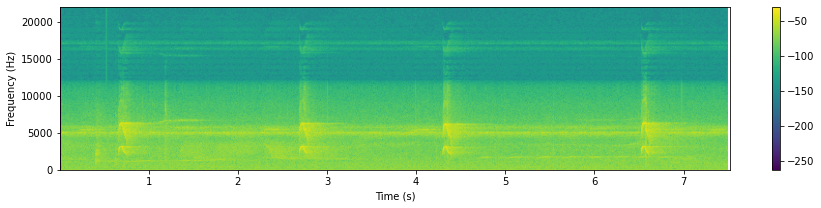

In [3]:
SIGNAL,SAMPLE_RATE = open_audio("White-crested_Spadebill.mp3")
plot.subplot(4,1,2)
plot.figure(figsize=(15,3))
plot.specgram(SIGNAL,Fs=SAMPLE_RATE,NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plot.colorbar()
plot.ylabel("Frequency (Hz)")
plot.xlabel("Time (s)")

# Pydub method to Build Numpy Array From mp3
### https://stackoverflow.com/questions/53633177/how-to-read-a-mp3-audio-file-into-a-numpy-array-save-a-numpy-array-to-mp3/53633178

Text(0.5, 0, 'Time (s)')

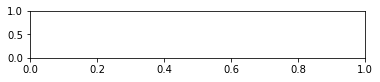

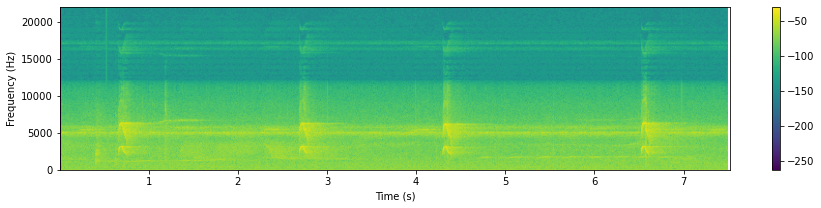

In [4]:
SAMPLE_RATE, SIGNAL = read("White-crested_Spadebill.mp3",True)
plot.subplot(4,1,3)
plot.figure(figsize=(15,3))
plot.specgram(SIGNAL,Fs=SAMPLE_RATE,NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plot.colorbar()
plot.ylabel("Frequency (Hz)")
plot.xlabel("Time (s)")

# Converting the mp3 to wav Using Pydub, Then Plotting the wav 
### https://pythonbasics.org/convert-mp3-to-wav/

Text(0.5, 0, 'Time (s)')

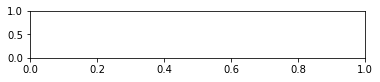

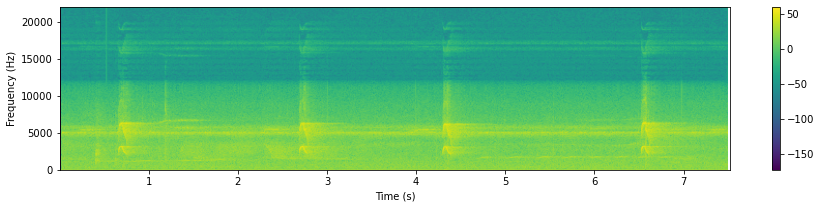

In [5]:
mp3_to_wav("White-crested_Spadebill.mp3");
WAV_FILE = "White-crested_Spadebill"
SAMPLE_RATE, SIGNAL = wavfile.read(WAV_FILE+".wav")
plot.subplot(4,1,4)
plot.figure(figsize=(15,3))
plot.specgram(SIGNAL,Fs=SAMPLE_RATE,NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plot.colorbar()
plot.ylabel("Frequency (Hz)")
plot.xlabel("Time (s)")

# Plotting mp3 to wav Audacity Conversion

<ipython-input-6-02992d316d92>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  SAMPLE_RATE, SIGNAL = wavfile.read(WAV_FILE+".wav")


Text(0.5, 0, 'Time (s)')

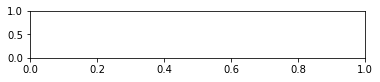

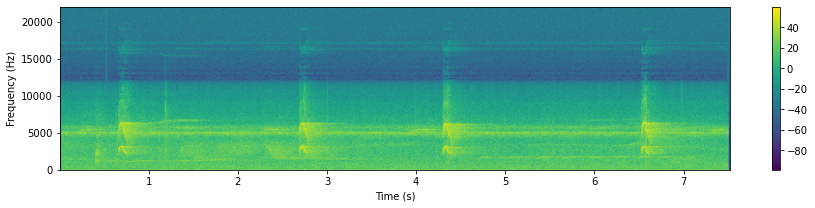

In [6]:
WAV_FILE = "White-crested_Spadebill_audacity_wav_conversion"
SAMPLE_RATE, SIGNAL = wavfile.read(WAV_FILE+".wav")
plot.subplot(4,1,4)
plot.figure(figsize=(15,3))
plot.specgram(SIGNAL,Fs=SAMPLE_RATE,NFFT = 1024, noverlap = 512, window = np.hanning(1024))
plot.colorbar()
plot.ylabel("Frequency (Hz)")
plot.xlabel("Time (s)")